In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display 

In [2]:
import numpy as np                     
import pandas as pd                  
import matplotlib.pyplot as plt        
import seaborn as sns                 
import datetime as dt                
from scipy import stats as st    

# Проведение А/В-теста для интернет-магазина

Выполняя роль аналитика крпного интернет-магазина. В сотрудничестве с отделом маркетинга, разрботан список гипотез для увеличения выручки. Необходимо приоритизировать гипотезы для выделения наиболее важных перспективных, и провести А\В тестирование в целях статистического подтверждения целесообразности и успешности выдвинутых гипотез.

## Приоритезация гипотез

А\В тестирование является относительно дорогостоящим инструментом, поэтому невозможно проверять все возможные гипотезы сколь угодно долго, на это попросту не хватит ресурсов. Для того, чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют. Существует множество методов приоритезации, в рамках данного проекта воспользуемся фреймворками ICE и RICE:

In [3]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis['Hypothesis'].unique()

array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

In [5]:
pd.set_option("max_colwidth", 110)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
pd.set_option("max_colwidth", 50)

В полученном датафрэйме содержатся девять гипотез с кратким описанием, а так же параметры Reach, Impact, Confidence и  Efforts необходимые для расчета фреймворков.

Одни из самых популярных способов приоритизации задач являются фреймворки ICE и RICE. Добавим столбцы с рассчитаными фреймворками и отсортируем гипотезы по приоритету.

### Фреймворк ICE

Выстроим гипотезы по приоритету расчитав для каждой параметр
$$ICE = \frac{Impact * Confidence}{Efforts}$$
:

In [7]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 
ICE_priority = hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
ICE_priority

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Согласно методу приоритезации ICE наиболее важными считаются гипотезы: скидка в День Рождения, добавление двух новых каналов привлечения и добавление формы подписки на основных страницах. А самыми незначительными оказались гипотезы по изменению структуры категорий и изменение цвета фона главной страницы.

### Фреймворк RICE

Теперь перейдем к определению показателя 

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$:

In [8]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'] 
RICE_priority = hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
RICE_priority

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


В данном рейтинге абсолютное лидерство у гипотезы с добавлением формы подписки на все основные страницы, также высокий приоритет имеет гипотеза с добавлением блоков рекомендаций товаров на сайте. Самая безперспективная гипотеза по прежнему - изменение  цвета фона главной страницы.

### Различия приоритезации фреймворков

In [9]:
priority = RICE_priority.merge(ICE_priority, on='Hypothesis')
priority

,Hypothesis,RICE,ICE
0,Добавить форму подписки на все основные страни...,112.0,11.200000
1,Добавить блоки рекомендаций товаров на сайт ин...,56.0,7.000000
2,"Добавить два новых канала привлечения трафика,...",40.0,13.333333
3,Показать на главной странице баннеры с актуаль...,40.0,8.000000
4,"Запустить акцию, дающую скидку на товар в день...",16.2,16.200000
5,"Изменить структура категорий, что увеличит кон...",9.0,1.125000
6,"Запустить собственную службу доставки, что сок...",4.0,2.000000
7,"Добавить страницу отзывов клиентов о магазине,...",4.0,1.333333
8,"Изменить цвет фона главной страницы, чтобы уве...",3.0,1.000000


По итогам расчетов получены разные рейтинги приоритета гипотез для каждого фреймворка. Это связано с различием в подходах данных фреймворков. Дело в том, что в RICE в отличие от ICE учитывается парметр Reach который учитывает количество пользователей на которых изменение повлияет, это добавляет тщательности и точности при определении приоритетов гипотезы. В нашем случае при расчете ICE не все гипотезы, имевшие высокий приоритет, оказывали влияние на большое количество аудитории, поэтому при вычислении RICE данные гипотезы потерялии свои лидирующие позиции в рейтинге.

## Анализ A/B-теста

Был проведен A/B-тест и получены результаты которые необходимо проанализировать и оценить. В наличии имеются два датафрейма один с данными о заказах и второй с данными о визитах. Изучим как в ходе испытания менялись интересующие нас метрики в каждой группе, а так же сформулируем решение по всем имеющимся результатам теста.

In [10]:
orders = pd.read_csv('orders.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))     #приведение даты к нужному типу данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
visitors = pd.read_csv('visitors.csv')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))   #приведение даты к нужному типу данных
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Все необходимые данные выгружены и приведены к нужным типа, теперь можно приступать к анализу результатов А/В-теста.

In [14]:
print(f'Количество дубликатов в orders: {orders.duplicated().sum()}')
print(f'Количество дубликатов в visitors: {visitors.duplicated().sum()}')

Количество дубликатов в orders: 0
Количество дубликатов в visitors: 0


In [15]:
err_users = orders[(orders['group'] == 'A') & (orders['visitorId'].
                    isin(orders[orders['group'] == 'B']['visitorId']))]['visitorId']
pd.set_option("max_rows", 8)
orders[orders['visitorId'].isin(err_users)].groupby('visitorId').agg({'group':'sum'}).reset_index()

,visitorId,group
0,8300375,BA
1,199603092,AABAA
2,232979603,BA
3,237748145,BAAAA
...,...,...
54,4120364173,AB
55,4186807279,BBA
56,4256040402,BAAABABAABA
57,4266935830,AB


In [16]:
orders = orders[~orders['visitorId'].isin(err_users.unique())]

### График куммулятивной выручки по группам

In [17]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]  
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsACummulative = visitorsADaily.apply(                        
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [18]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(                       
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [19]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}  
)                                                                   
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative = ordersADaily.apply(               
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}
    ), axis=1
).sort_values(by='date')
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [20]:
ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}
)                                                                   
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative = ordersBDaily.apply(         
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date' : 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}
    ), axis=1
).sort_values(by='date')
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

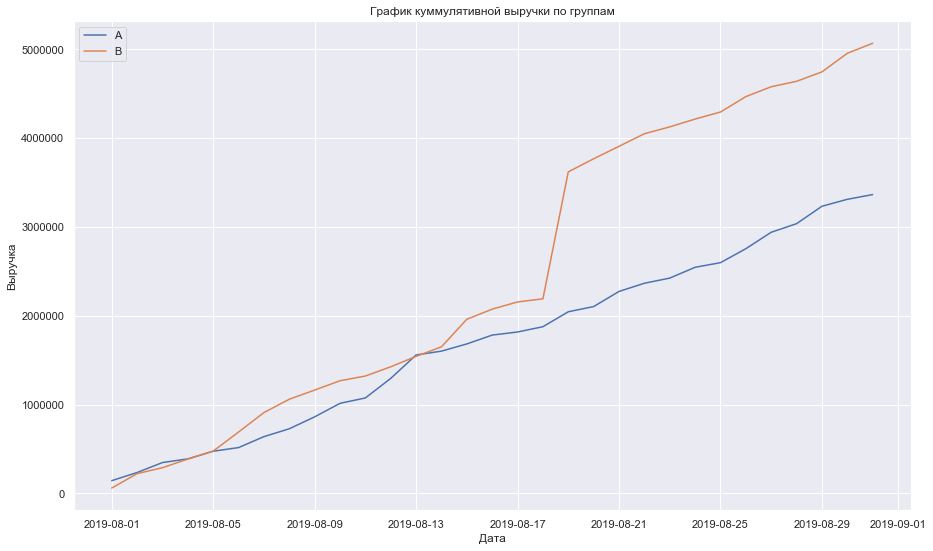

In [21]:
sns.set(style='darkgrid')
plt.figure(figsize=(15, 9))
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA'], label='A')
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB'], label='B')
plt.legend()
plt.title('График куммулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

Выручка растет. По данному показателю группа В лидирует, а так же в ней имеется резкий всплеск роста выручки, возможно наличие аномально дорогих заказов или резкое увеличение их числа.

### График куммулятивного среднего чека по группам

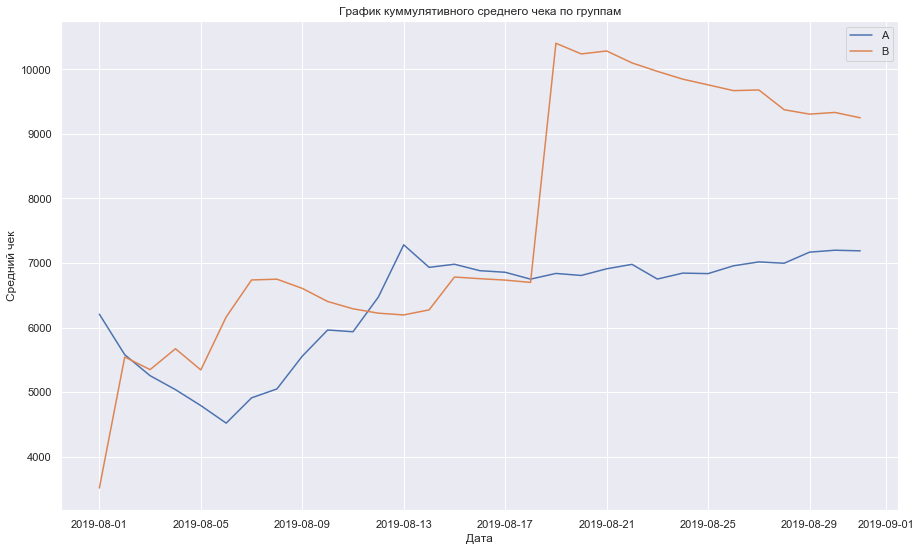

In [22]:
plt.figure(figsize=(15, 9))
plt.plot(ordersACummulative['date'], ordersACummulative['revenueCummulativeA']/ordersACummulative['ordersCummulativeA'], label='A')
plt.plot(ordersBCummulative['date'], ordersBCummulative['revenueCummulativeB']/ordersBCummulative['ordersCummulativeB'], label='B')
plt.legend()
plt.title('График куммулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()

Ближе к концу испытания средний чек практически установился группы A, а вот в группе B он продолжает равномерно убывать, это связанно с предшествующим ему аномальным всплеском, возможно в группу попали крупные заказы. В таком случае необходимо больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения куммулятивного среднего чека группы В к группе А

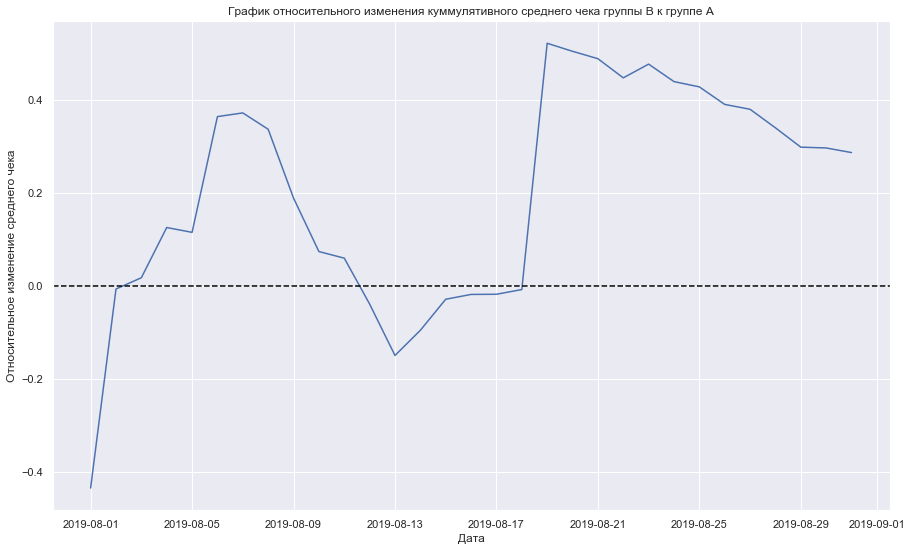

In [23]:
mergedCumulativeRevenue = ordersACummulative.merge(ordersBCummulative, left_on='date', right_on='date', how='left')
plt.figure(figsize=(15, 9))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueCummulativeB']/mergedCumulativeRevenue['ordersCummulativeB'])
         /(mergedCumulativeRevenue['revenueCummulativeA']/mergedCumulativeRevenue['ordersCummulativeA']) - 1
)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения куммулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего чека')
plt.show()

Большую часть времени средний чек группы В преобладает над средним чеком группу А. Параметр не установился и резко менятся, это определенно из-за наличия выбросов в данных.

### График куммулятивной конверсии по группам

In [24]:
data = (                                                  #создание общего датафрейма со всеми куммулятивными параметрами
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


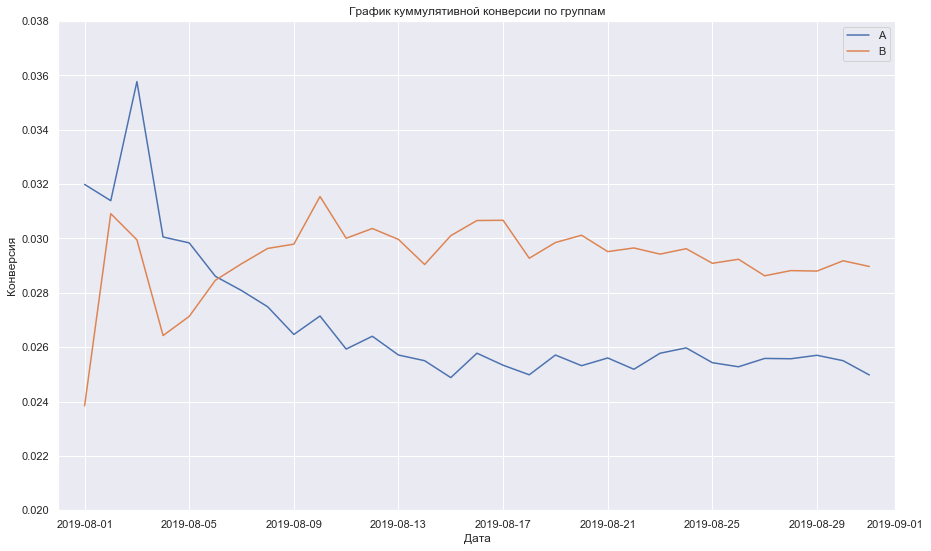

In [25]:
data['conversionA'] = data['ordersCummulativeA'] / data['visitorsCummulativeA']
data['conversionB'] = data['ordersCummulativeB'] / data['visitorsCummulativeB']

plt.figure(figsize=(15, 9))
plt.plot(data['date'], data['conversionA'], label='A')
plt.plot(data['date'], data['conversionB'], label='B')

plt.legend()
plt.title('График куммулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
#plt.axis(["2019-07-31", '2019-09-1', 0.01, 0.05])
plt.axis(["2019-07-31", '2019-09-1', 0.02, 0.038])
plt.show()

После резких колебаний в начале исследования конверсия выровнялась и установилась. Группа В уверенно лидирует над группой А по этому показателю.

### График относительного изменения куммулятивной конверсии группы В к группе А

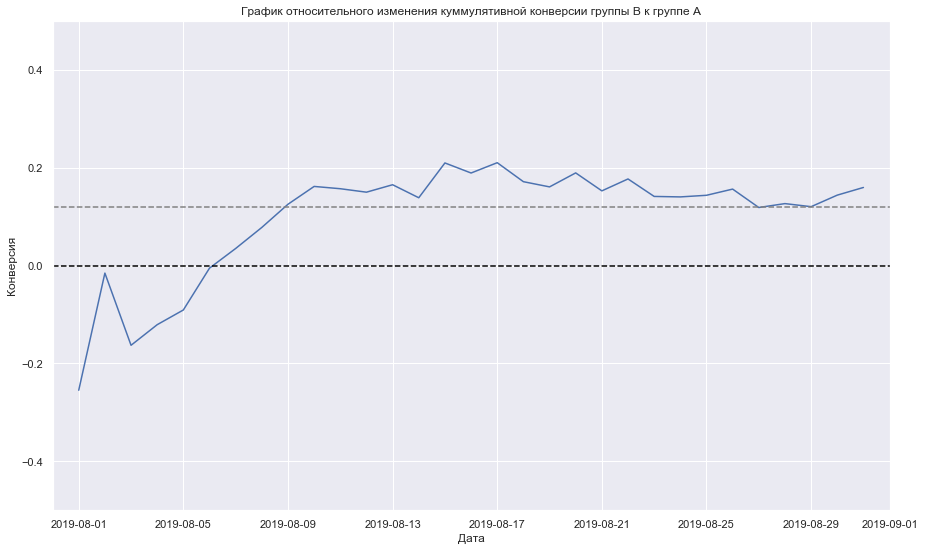

In [26]:
plt.figure(figsize=(15, 9))
plt.plot(data['date'], data['conversionB'] / data['conversionA'] - 1)
plt.title('График относительного изменения куммулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='grey', linestyle='--')
plt.axis(["2019-07-31", '2019-09-1', -0.5, 0.5])
plt.show()

В начале теста группа B незначительно проигрывала группе A, затем вырвалась вперёд и выровнялась.

### Точечный график количества заказов по пользователям

In [27]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})     #количество заказов пользователя
)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head()

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3


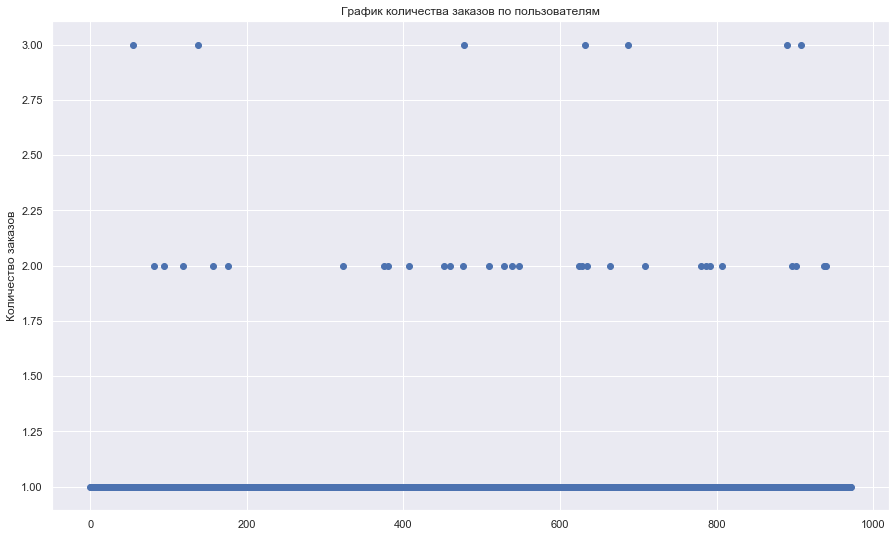

In [28]:
plt.figure(figsize=(15, 9))
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.show()

Предположения подтвердились, в данных имеются выбросы. На графике наблюдается несколько пользователей с большим количеством заказов. Согласно графику границей аномалий может служить величина в  4 - 5 заказов.

### Подсчёт  95-ой и 99-ой перцентили количества заказов на пользователя

Чтобы определить какое количество заказов можно считать выбросом, для этого необходимо оценить какая доля покупателей совершила определенное количество заказов. Расчет перцентилей поможет в данном вопросе: 

In [29]:
print('95-ая перцентиль - ', end='')
print(np.percentile(ordersByUsers['orders'], 95))
print('99-ая перцентиль - ', end='')
print(np.percentile(ordersByUsers['orders'], 99)) 

95-ая перцентиль - 1.0
99-ая перцентиль - 2.0


Оказывается менее 5% покупителей делает более двух заказов. Будем считать более 3 покупок от одного покупателя выбросом.

### Точечный график стоимостей заказов

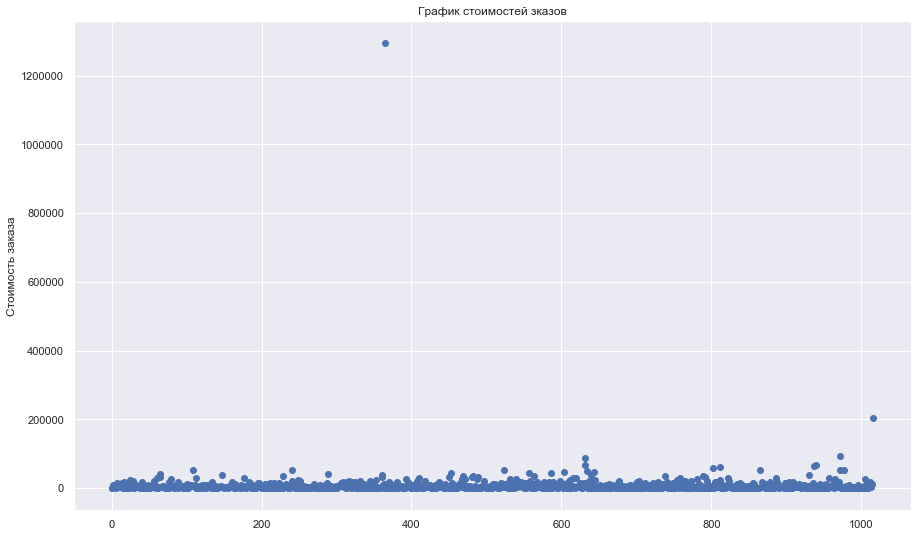

In [30]:
plt.figure(figsize=(15, 9))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей зказов')
plt.ylabel('Стоимость заказа')
plt.show()

В меньшем масштабе, для наглядности:

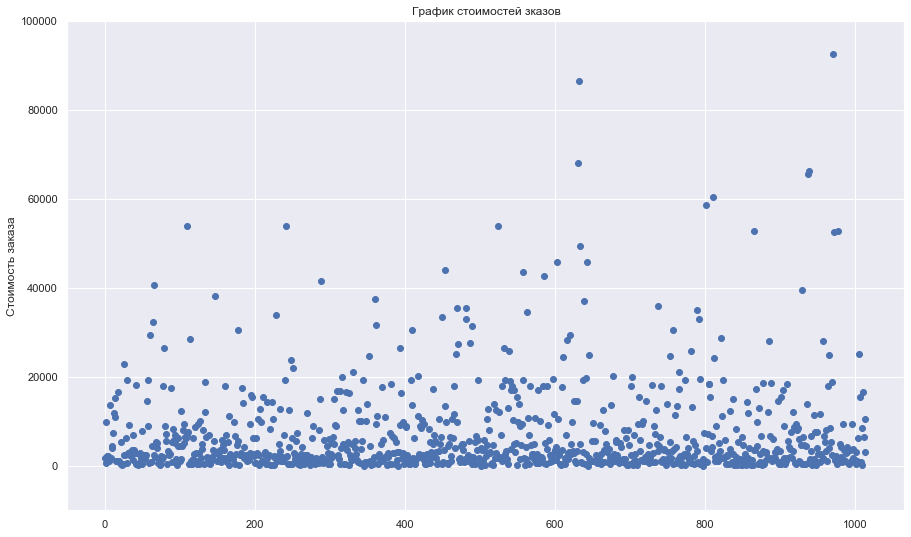

In [31]:
plt.figure(figsize=(15, 9))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей зказов')
plt.ylabel('Стоимость заказа')
plt.axis([-50, len(orders['revenue']) + 50, -10000, 100000])
plt.show()

Как и предполагалось есть немного очень дорогих заказов, от столь высоких значений следует избавиться.  По графику можно было бы выбрать границу аномальных заказов между 40 000 и 60 000. Снова обратимся к перцентилям, чтобы точно определить граничное значение.

### Подсчёт  95-ой и 99-ой перцентили стоимости заказов

И снова для определения доли покупателей совершивших очень дорогие заказы, вызовем метод для расчета перцентилей:

In [32]:
print('95-ая перцентиль - ', end='')
print(np.percentile(orders['revenue'], 95).round())
print('99-ая перцентиль - ', end='')
print(np.percentile(orders['revenue'], 99).round()) 

95-ая перцентиль - 26785.0
99-ая перцентиль - 53904.0


Решено, границей аномальных значений будет являться отметка в 40000. Все заказы дороже этого числа, отнесем к выбросам.

Теперь приступим к расчетам статистических параметров, чтобы оценить степень различия между группами это необходимо для принятия итогового решения по проведению А/В-теста. Для "сырых" и "очищенных" данных нужно посчитать статистические значимости различий в конверсии и среднем чеке, между группами. После этого, на основании всех исследовании принять решение по А/В-тесту.
И еще, за уровень статистической значимости принято значение - 0.05.

### Подсчёт статистической значимости различий в конверсии между группами по «сырым» данным

С помощью непараметрического теста Уилкоксона-Манна-Уитни определим достаточно ли разнятся данные по конверсии в группах.

In [33]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']                                   

In [34]:
ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']                                      

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(           
    0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0
)                                 

In [36]:
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(
    0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0
)                                   

In [37]:
print('p_value - ', end='')
print("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное отличие конверсии группы В от группы А - ', end='')
print("{0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

p_value - 0.006
Относительное отличие конверсии группы В от группы А - 16.0%


P-значение меньше установленного уровня значимости, а это значит, что нулевая теория об отсутствии статисически значимых различий в конверсии между группами, может быть уверенно отвергнута. Различия в конверсии групп А и В имеются. В добавок конверсия группы В на 13.8% выше чем в группе А. Похоже мы на пути успешного А/В-теста.

### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

По аналогии с конверсией, прибегнув к статистическим методам оценим различие в среднем чеке в группах:

In [38]:
print('p_value - ', end='')
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное отличие среднего чека группы В от группы А - ', end='')
print('{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1)) 

p_value - 0.415
Относительное отличие среднего чека группы В от группы А - 28.7%


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако средний чек группы B значительно выше среднего чека группы A, на целых 25.9% больше. Тут все выглядит не так однозначно. Посмотрим как изменятся показания в "чистых" данных.

### Подсчёт статистической значимости различий в конверсии между группами по «очищенным» данным

Перед расчетами отфильтруем данные, избавимся от пользователей совершивших более 3 заказов, а так же заказов дороже 40000:

In [39]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head())
print(abnormalUsers.shape[0]) 

1099    148427295
684     358944393
648     382846391
1137    759473111
339     834731816
Name: visitorId, dtype: int64
23


Всего 34 аномальных пользователя. Избавимся от них:

In [40]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],
    axis=0
)

In [41]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],
    axis=0
)

In [42]:
print('p_value - ', end='')
print("{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное отличие конверсии группы В от группы А - ', end='')
print("{0:.1%}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p_value - 0.003
Относительное отличие конверсии группы В от группы А - 17.8%


После "очистки" данных р-значение незначительно изменилось, оно попрежнему определенно меньше 0.05, а значит нулевая гипотеза попрежнему отвергнута, и можно говорить о различии в конверсиях исследуемых групп. В новых данных значение относительной конверсии в группах немного возросло и стало равным 16.4%.

### Подсчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

По аналогии с подпунктом 2.11 определим статистическую значимость различий в среднем чеке, только теперь уже для отфильтрованных данных:

In [43]:
print('p_value - ', end='')
print('{0:.3f}'.format(st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B', 
    np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
    )
)
print('Относительное отличие среднего чека группы В от группы А - ', end='')
print("{0:.1%}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
    ['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId']
    .isin(abnormalUsers)))]['revenue'].mean() - 1
    )
) 

p_value - 0.416
Относительное отличие среднего чека группы В от группы А - 5.1%


Очистка данных немного уменьшила р-значение для статистической значимости различий в среднем чеке, только этого совершенно недостаточно для того, чтобы отвергнуть нулевую гипотезу. И кстати, относительное отличие среднего чека упало с 25.9% до 6%, что не так уж и много, значит нельзя сказать о различии исследуемых групп.

**Нулевая гипотеза** - статисически значимые различия в конверсии/среднем чеке между группами отсутствуют, то есть группы между собой равны.
    
**Альтернативная гипотеза** - сравниваемые группы имеют значительные статистические различия в конверсии/среднем чеке и не равны между собой. 


### Принятие решения по результатам теста

По всем полученным результатам теста, было принято решение продолжить его. Имеется статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий, а график различия конверсии между группами сообщает, что результаты группы B лучше группы A и зафиксировались около среднего значения. Однозначно конверсия в группе В лучше чем в группе А. Все это ведет в сторону успеха гипотезы, вот только этого недостаточно для абсолютного успеха. Необходимы статистические улучшения в выручке группы с нововведениями. Хотя статистические изменения и не наблюдаются, но можно сказать об изменениях систематических. Относительное отличие среднего чека группы В от группы А - 6%, а график относительного изменения куммулятивного среднего чека так же говорит о преобладании группы В. Все дело в том, что график сильно колеблется из-за наличия выбросов, и поэтому не успел установиться вблизи определенного значения. Именно поэтому следует продолжать тест, есть параметры по которым еще рано делать выводы, к тому же есть все предпосылки предполагать успешное завершение теста.

<hr style="border: 2px solid blue;" />

## Дополнительное исследование*

Построил графики кумулятивной выручки и кумулятивного среднего чека по очищенным данным и убедился в ваших словах.))

Сложно игнорировать превосходство в прибыльности группы В над группой А, в очищенных данных она кажется однозначной, по крайней мере визуально. И поэтому мне сложно точно определиться, можно ли основываясь на этих данных, сдлеать вывод об успешности теста, проигнорировав отсутствие статистических различий в среднем чеке для разных групп???

In [44]:
search = orders[orders['revenue'] < 40000]

In [45]:
visitorsADaily_1 = visitors[visitors['group'] == 'A'][['date', 'visitors']]  #количество визитов ежедневно группа А
visitorsADaily_1.columns = ['date', 'visitorsPerDateA']
visitorsACummulative_1 = visitorsADaily_1.apply(                        #куммулятвное количество визитов за каждую дату группа А
    lambda x: visitorsADaily_1[visitorsADaily_1['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1
)
visitorsACummulative_1.columns = ['date', 'visitorsCummulativeA']

In [46]:
visitorsBDaily_1 = visitors[visitors['group'] == 'B'][['date', 'visitors']]  #количество визитов ежедневно группа В
visitorsBDaily_1.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative_1 = visitorsBDaily_1.apply(                        #куммулятвное количество визитов за каждую дату группа В
    lambda x: visitorsBDaily_1[visitorsBDaily_1['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1
)
visitorsBCummulative_1.columns = ['date', 'visitorsCummulativeB']

In [47]:
ordersADaily_1 = search[search['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}  
)                                                                   #количество заказов и выручка ежедневно группа А
ordersADaily_1.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersACummulative_1 = ordersADaily_1.apply(                #куммулятвное количество заказов и выручка за каждую дату группа А
    lambda x: ordersADaily_1[ordersADaily_1['date'] <= x['date']].agg(
        {'date' : 'max', 'ordersPerDateA' : 'sum', 'revenuePerDateA' : 'sum'}
    ), axis=1
).sort_values(by='date')
ordersACummulative_1.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [48]:
ordersBDaily_1 = search[search['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby(
    'date', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'}
)                                                                   #количество заказов и выручка ежедневно группа В
ordersBDaily_1.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBCummulative_1 = ordersBDaily_1.apply(                #куммулятвное количество заказов и выручка за каждую дату группа В
    lambda x: ordersBDaily_1[ordersBDaily_1['date'] <= x['date']].agg(
        {'date' : 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB' : 'sum'}
    ), axis=1
).sort_values(by='date')
ordersBCummulative_1.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

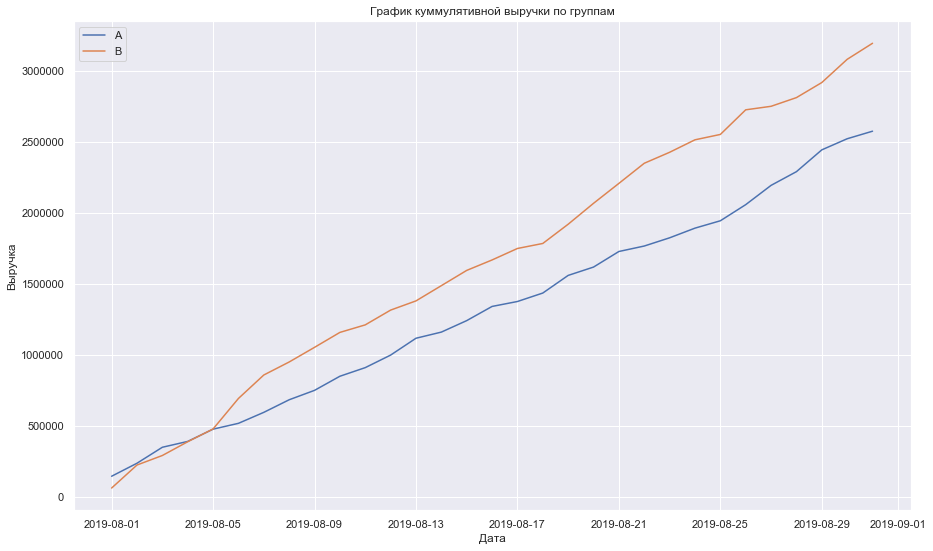

In [49]:
plt.figure(figsize=(15, 9))
plt.plot(ordersACummulative_1['date'], ordersACummulative_1['revenueCummulativeA'], label='A')
plt.plot(ordersBCummulative_1['date'], ordersBCummulative_1['revenueCummulativeB'], label='B')
plt.legend()
plt.title('График куммулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.show()

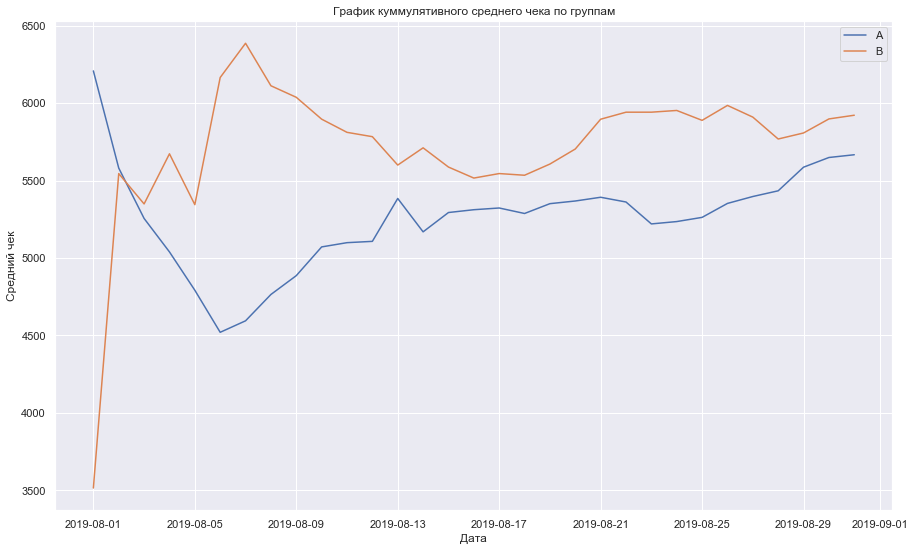

In [50]:
plt.figure(figsize=(15, 9))
plt.plot(ordersACummulative_1['date'], ordersACummulative_1['revenueCummulativeA']/ordersACummulative_1['ordersCummulativeA'], label='A')
plt.plot(ordersBCummulative_1['date'], ordersBCummulative_1['revenueCummulativeB']/ordersBCummulative_1['ordersCummulativeB'], label='B')
plt.legend()
plt.title('График куммулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.show()